#### Campaign for selling personal loans.

This case is about a bank (Thera Bank) which has a growing customer base. Majority of these customers are liability customers (depositors) with varying size of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.

The department wants to build a model that will help them identify the potential customers who have higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.

#### On the dataset 
The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

In [111]:
#Importing all the necessary modules
import warnings
warnings.simplefilter('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
%matplotlib inline
sns.set(style="ticks")

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection

### 1. Use a new python notebook and read the column description and ensure you understand each attribute well

In [112]:
data = pd.read_csv('Bank_Personal_Loan_Modelling-1.csv')

In [113]:
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [114]:
data.shape

(5000, 14)

In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


#### Information on the features or attributes

The binary category have five variables as below:

* Personal Loan - Did this customer accept the personal loan offered in the last campaign? ** This is our target variable**
* Securities Account - Does the customer have a securities account with the bank?
* CD Account - Does the customer have a certificate of deposit (CD) account with the bank?
* Online - Does the customer use internet banking facilities?
* Credit Card - Does the customer use a credit card issued by UniversalBank?

Interval variables are as below:

* Age - Age of the customer
* Experience - Years of experience
* Income - Annual income in dollars
* CCAvg - Average credit card spending
* Mortage - Value of House Mortgage

Ordinal Categorical Variables are:
* Family - Family size of the customer
* Education - education level of the customer

The nominal variable is :

* ID
* Zip Code

At Later states we will eliminiate nominal variables, hoever Zip Code we try to see how they are corelated with target variable first

In [116]:
# This code will drop the Id columns where variance is less thean 1
data.drop(['ID'], axis=1, inplace=True)

In [117]:
# No columns have null data in the file
data.apply(lambda x : sum(x.isnull()))

Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [118]:
#finding unique data
data.apply(lambda x: len(x.unique()))

Age                    45
Experience             47
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

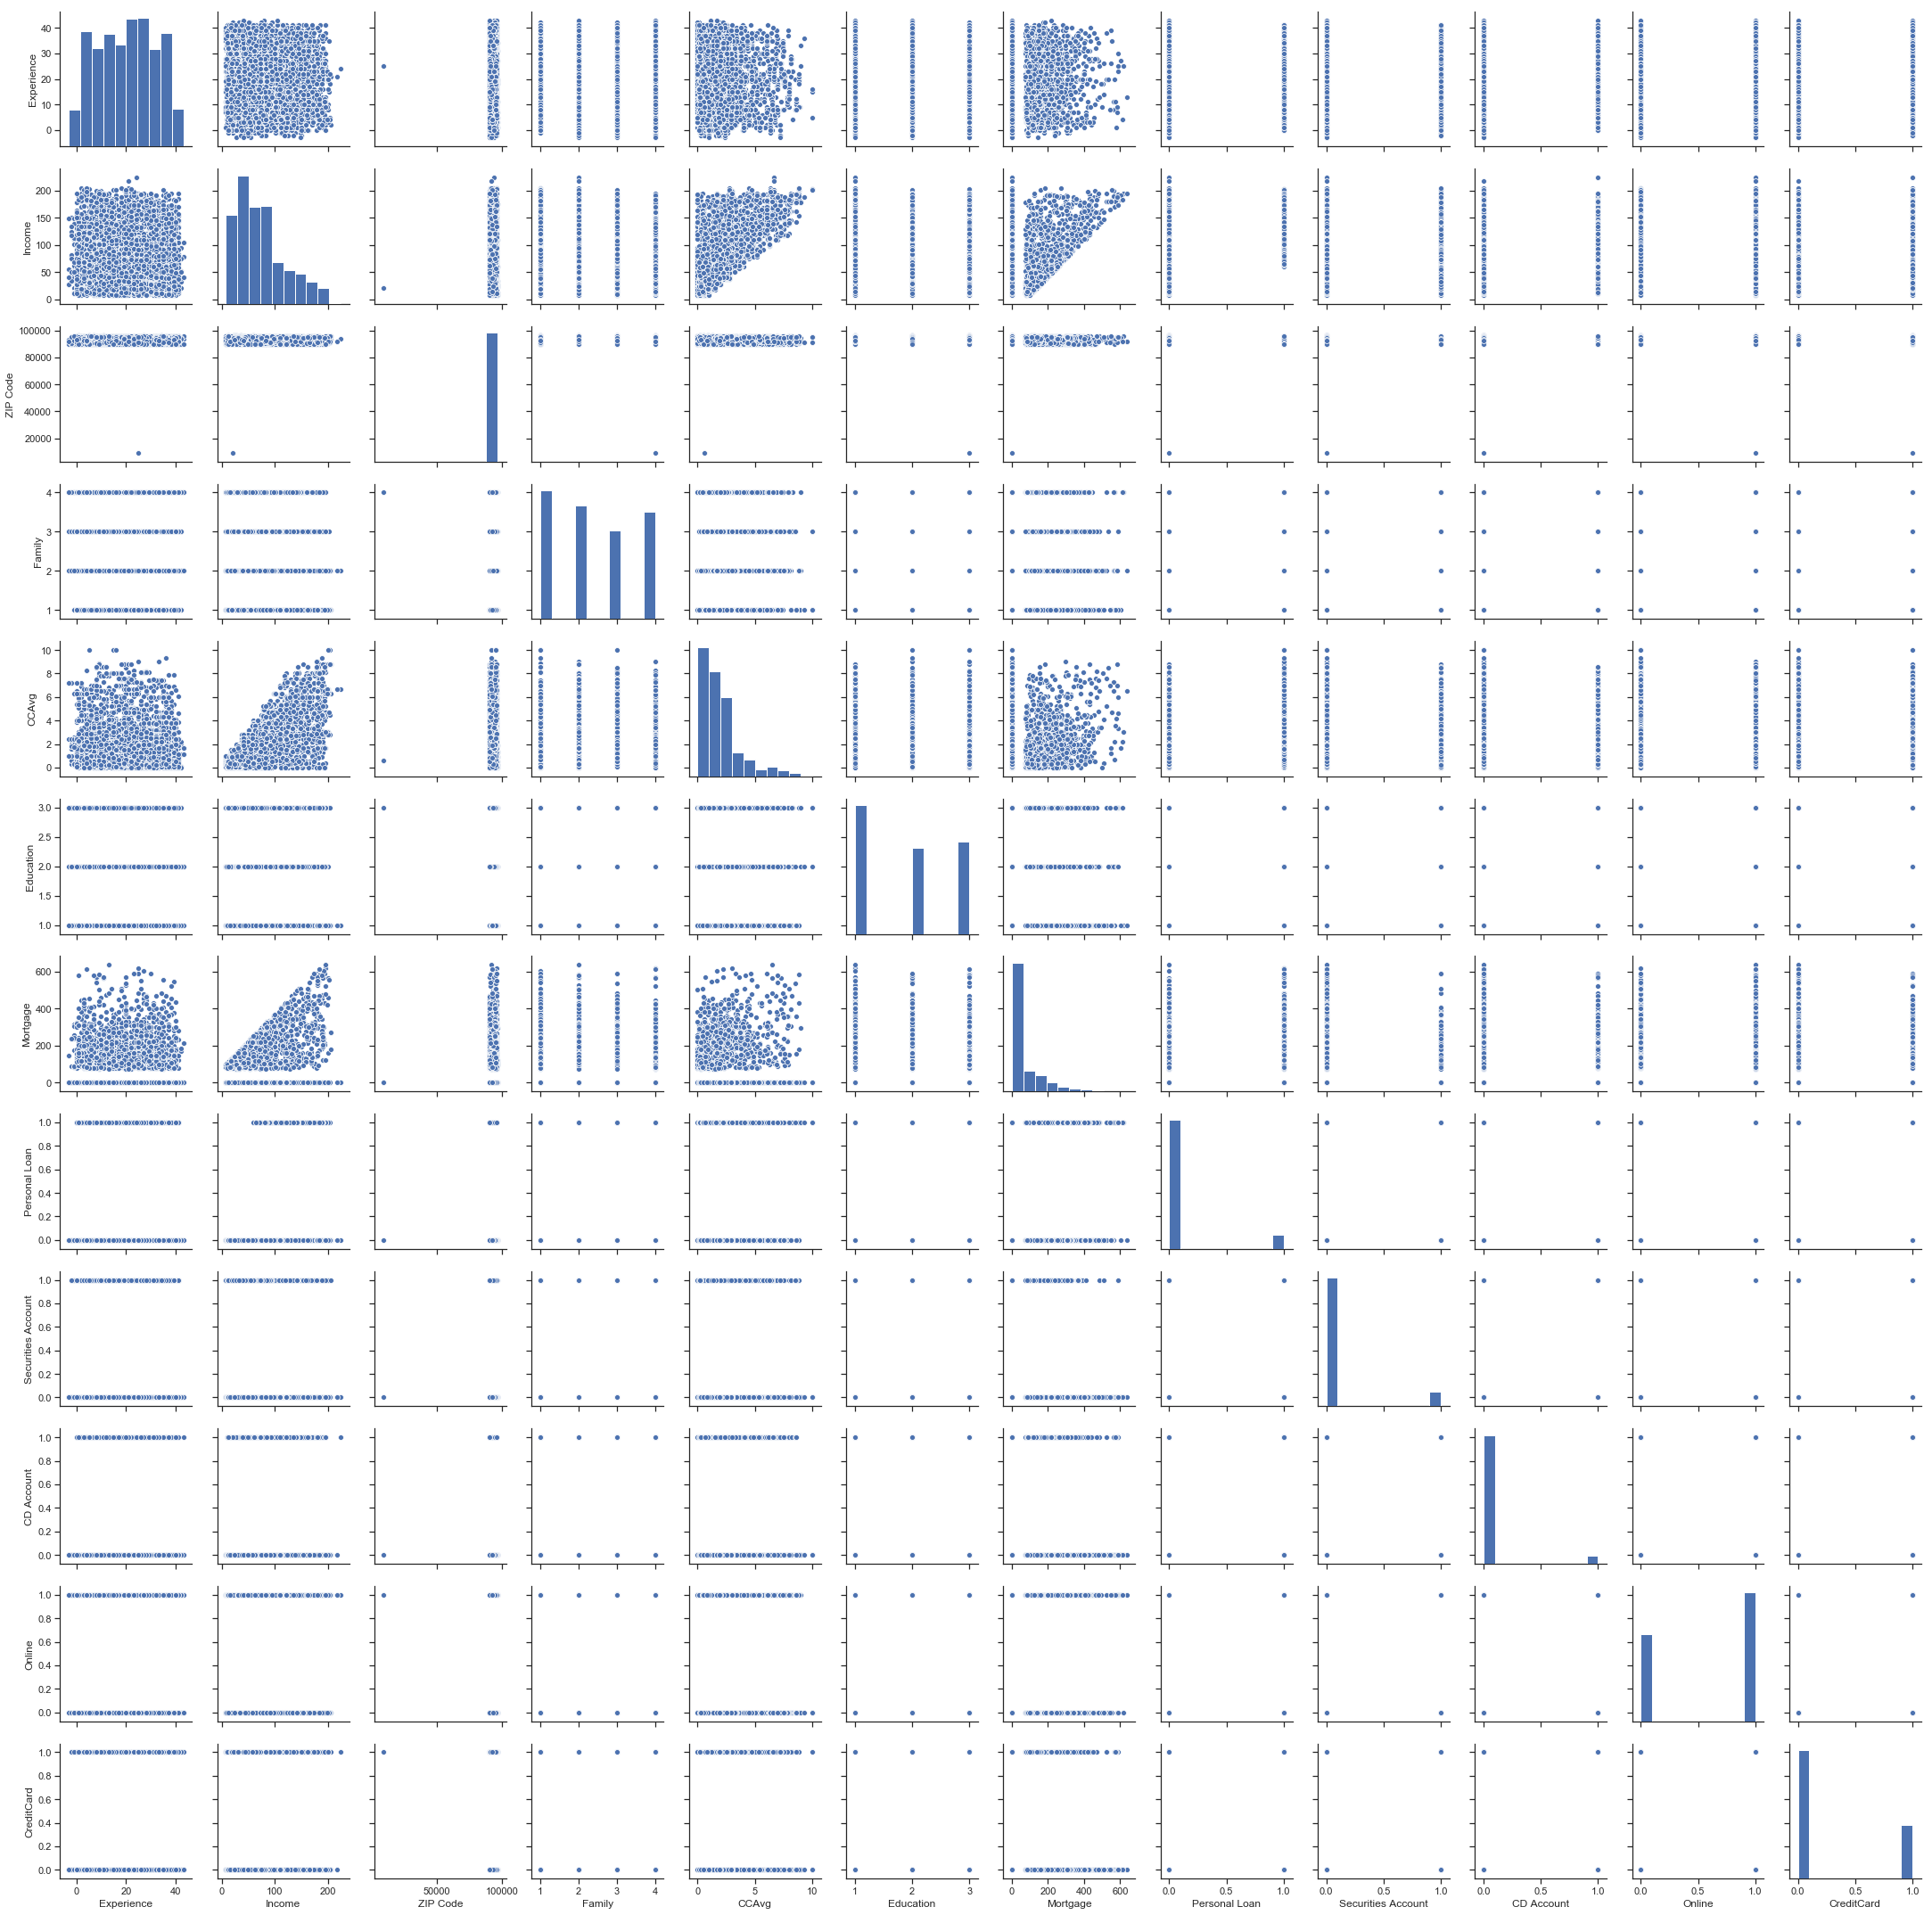

In [119]:
sns.pairplot(data.iloc[:,1:])

In [120]:
# Eye balling the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


### 2. Study the data distribution in each attribute, share your findings. (5 points)

* **Age** feature is normally distributed. We can confirm this by looking at the `describe` statement above, which shows **mean** is almost equal to **median**
* **Experience** is normally distributed. Here the **mean** is equal to **median**. There are negative values in the **Experience**. This could be a data input error as in general it is not possible to measure negative years of experience. We can delete / process these values.
* **Income** is right skewed. Majority of the customers have income between 45K and 55K. We can confirm this by saying the **mean** is greater than the **median**
* **CCAvg** is also a right skewed variable and average spending is between 0K to 10K and majority spends less than 2.5K
* **Mortgage**  70% of the individuals have a mortgage of less than 40K. However the max value is 635K
* The variables family and education are ordinal variables. The distribution of families is evenly distributes

In [121]:
data[data['Experience'] < 0]['Experience'].value_counts()

-1    33
-2    15
-3     4
Name: Experience, dtype: int64

In [122]:
pd.value_counts(data.Experience < 0)

False    4948
True       52
Name: Experience, dtype: int64

#### There are 52 records with negative experien, which is nearly 1% of the total data set
We can either:
1. drop the negative values
2. replace with Experience Median
3. Change the negative values to positive OR
4. Try to find co-relation with other feature

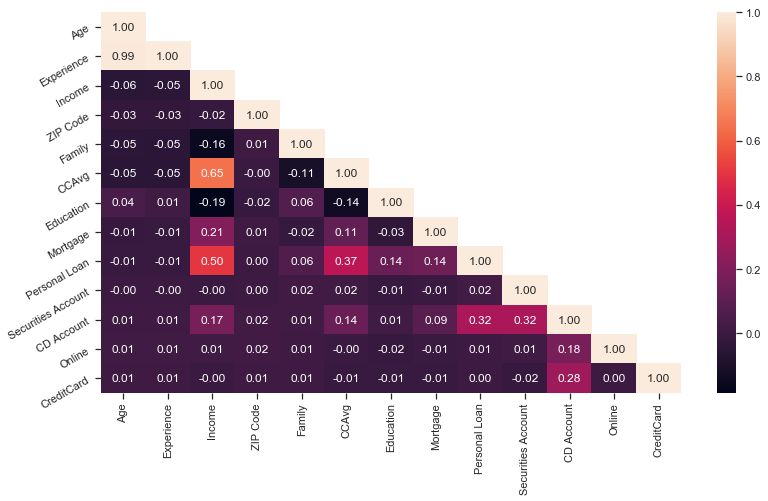

In [123]:
# Correlation with heat map
import matplotlib.pyplot as plt
import seaborn as sns
corr = data.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

**Observation**
* Income and CCAvg is moderately correlated. 
* Age and Experience is highly correlated

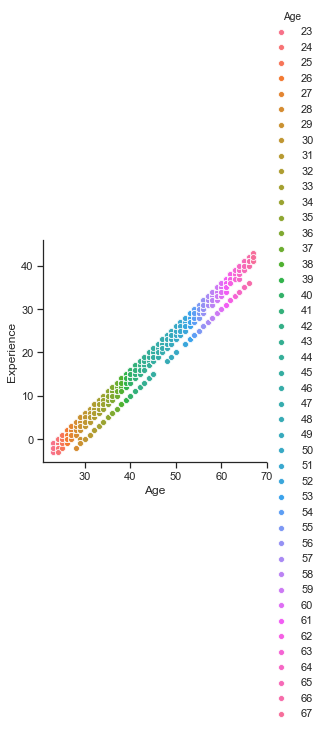

In [124]:
sns.pairplot(data, y_vars = 'Experience', x_vars = 'Age', height = 4, hue='Age')

The above plot show with experience and age have a positive correlation. As experience increase age also increases, hence we can drop experience

In [125]:
# This code will drop the Experience column
data.drop(['Experience'], axis=1, inplace=True)

In [126]:
data.head(2)

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0


# 3.Get the target column distribution. Your comments

#### A. Influence of income and education on personal loan 

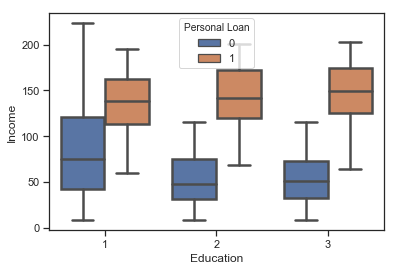

In [127]:
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=data)

**Observation** : It seems the customers whose education level is 1 is having more income. However customers who has taken the personal loan have the same income levels

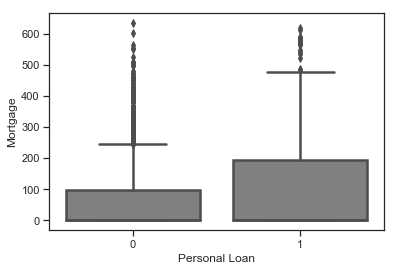

In [128]:
sns.boxplot(x="Personal Loan", y='Mortgage', data=data,color='grey')

**Inference** : From the above chart it seems that customer who do not have personal loan and customer who has personal loan have high mortgage

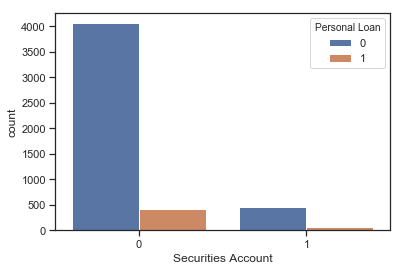

In [129]:
sns.countplot(x="Securities Account", data=data,hue="Personal Loan")

**Observation** : Majority of customers who does not have loan have securities account

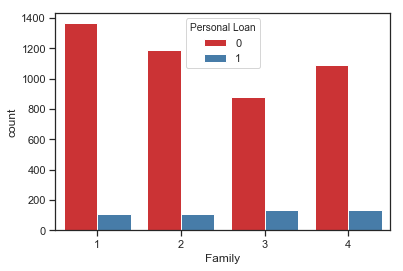

In [130]:
sns.countplot(x='Family',data=data,hue='Personal Loan',palette='Set1')

**Observation**: Family size does not have any impact in personal loan. But it seems families with size of 3 or 4 are more likely to take loan. When considering future campaign this might be good association.

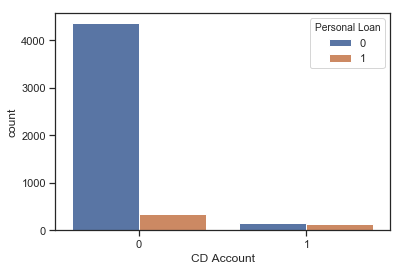

In [131]:
sns.countplot(x='CD Account',data=data,hue='Personal Loan')

**Observation**: Customers who does not have CD account , does not have loan as well. This seems to be majority. But almost all customers who has CD account has loan as well

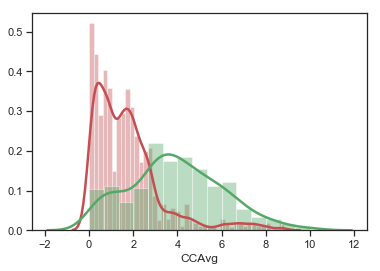

In [132]:
sns.distplot( data[data['Personal Loan'] == 0]['CCAvg'], color = 'r')
sns.distplot( data[data['Personal Loan'] == 1]['CCAvg'], color = 'g')

In [133]:
print('Credit card spending of Non-Loan customers: ',data[data['Personal Loan'] == 0]['CCAvg'].median()*1000)
print('Credit card spending of Loan customers    : ', data[data['Personal Loan'] == 1]['CCAvg'].median()*1000)

Credit card spending of Non-Loan customers:  1400.0
Credit card spending of Loan customers    :  3800.0


**Observation**: The graph show persons who have personal loan have a higher credit card average. Average credit card spending with a median of 3800 dollar indicates a higher probability of personal loan.  Lower credit card spending with a median of 1400 dollars is less likely to take a loan. This could be useful information.

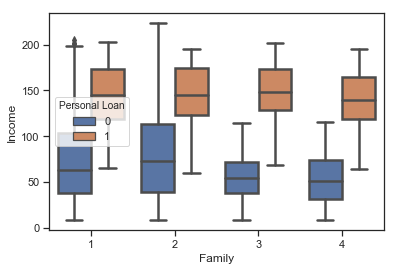

In [134]:
sns.boxplot(x=data.Family,y=data.Income,hue=data['Personal Loan'])
# Looking at the below plot, families with income less than 100K are less likely to take loan,than families with 
# high income

# 4. Split the data into training and test set in the ratio of 70:30 respectively

In [135]:
x = data.drop(['Personal Loan','ZIP Code'],axis=1)
y = data[['Personal Loan']]

print(x.shape)
print(y.shape)

#from sklearn.model_selection import train_test_split
#train_set, test_set = train_test_split(data, test_size=0.3 , random_state=0)

(5000, 10)
(5000, 1)


In [136]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3500, 10)
(1500, 10)
(3500, 1)
(1500, 1)


## 5. Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans (15 points)

## 6. Print the confusion matrix for all the above models (5 points)

### I. Naïve Bayes

In [137]:
model=GaussianNB()
model.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

### Test Naïve Bayes Model

In [138]:
# make predictions
expected = y_test
predicted = model.predict(x_test)

### Print Accuracy and Confusion Matrix and Conclude your findings

In [139]:
from sklearn import metrics
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       0.96      0.91      0.94      1372
           1       0.39      0.59      0.47       128

   micro avg       0.89      0.89      0.89      1500
   macro avg       0.67      0.75      0.70      1500
weighted avg       0.91      0.89      0.90      1500



In [140]:
# Print Training and Testing accuracy

print("Naïve Bayes Training Accuracy: ", model.score(x_train, y_train))
print("Naïve Bayes Testing Accuracy : ", model.score(x_test, y_test))

Naïve Bayes Training Accuracy:  0.8831428571428571
Naïve Bayes Testing Accuracy :  0.886


### II. KNN ( K - Nearest Neighbour )

In [141]:
knn = KNeighborsClassifier(n_neighbors= 21 , weights = 'uniform', metric='euclidean')
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=21, p=2,
           weights='uniform')

### Test KNN Model

In [142]:
# make predictions
expected = y_test
predicted = knn.predict(x_test)

### Print Accuracy and Confusion Matrix and Conclude your findings

In [143]:
from sklearn import metrics
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1372
           1       0.51      0.21      0.30       128

   micro avg       0.92      0.92      0.92      1500
   macro avg       0.72      0.60      0.63      1500
weighted avg       0.89      0.92      0.90      1500



In [144]:
# Print Training and Testing accuracy

print("KNN Training Accuracy: ", knn.score(x_train, y_train))
print("KNN Testing Accuracy : ", knn.score(x_test, y_test))

KNN Training Accuracy:  0.9097142857142857
KNN Testing Accuracy :  0.9153333333333333


### III. LogisticRegression

In [145]:
# Fit the model on 30%

logic_r = LogisticRegression()
logic_r.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

### Test Logistic Regression Model

In [146]:
# make predictions
expected = y_test
predicted = logic_r.predict(x_test)

### Print Accuracy and Confusion Matrix and Conclude your findings

In [147]:
from sklearn import metrics
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1372
           1       0.81      0.58      0.68       128

   micro avg       0.95      0.95      0.95      1500
   macro avg       0.89      0.78      0.83      1500
weighted avg       0.95      0.95      0.95      1500



In [148]:
# Print Training and Testing accuracy

print("Logistic Regression Training Accuracy: ", logic_r.score(x_train, y_train))
print("Logistic Regression Testing Accuracy : ", logic_r.score(x_test, y_test))

Logistic Regression Training Accuracy:  0.9477142857142857
Logistic Regression Testing Accuracy :  0.9526666666666667


## 7. Give your reasoning on which is the best model in this case and why it performs better? (5 points)

### Conclusion
The aim of the universal bank is to convert there liability customers into loan customers. They want to set up a new marketing campaign; hence, they need information about the connection between the variables given in the data. Four classification algorithms were used in this study. From the above graph , it seems like **Logistic Regression** algorithm have the highest accuracy and we can choose that as our final model.

LR performs better than naive bayes and KNN upon colinearity, as naive bayes expects all features to be independent and KNN supports non-linear solutions in better way. Being reason LR performed well in above classification problem.